# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

Student Information
Name: Edoardo Dominikus Kurniawan Putra

Student ID: 108006222

GitHub ID: edoardodominikus

Kaggle name: Edoardo Dominikus

Kaggle private scoreboard snapshot:
    
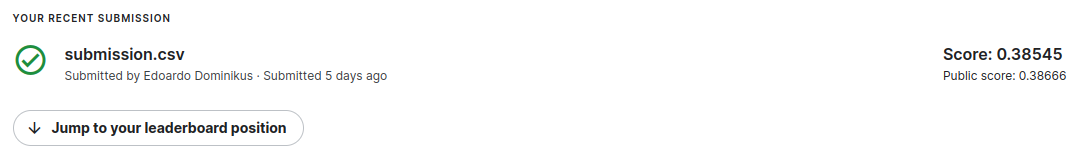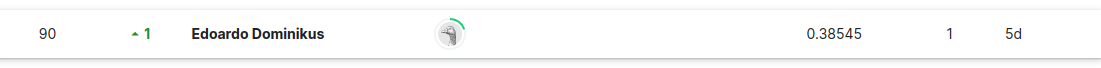

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



## Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow
import keras
%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.0.1
tensorflow: 2.6.4
keras: 2.6.0


---
# Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic0.png)

---
# 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("../input/emotions/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../input/emotions/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../input/emotions/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../input/emotions/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("../input/emotions/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../input/emotions/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../input/emotions/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../input/emotions/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


# Plot Train Data

In [8]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) 
analyze = count_vect.build_analyzer()
word_list = count_vect.get_feature_names_out()
print(len(word_list))
print(word_list[500:2000])



10115
['alwayss' 'alyankovic' 'alyssasimpson21' ... 'controlled' 'controlling'
 'controls']


In [9]:
print(train_counts.shape[1])
print(train_counts[0])

10115
  (0, 2274)	1
  (0, 10051)	1
  (0, 5410)	1
  (0, 5577)	3
  (0, 2168)	1
  (0, 537)	2
  (0, 7989)	1
  (0, 9119)	2
  (0, 8930)	1
  (0, 6885)	1
  (0, 9785)	1
  (0, 5957)	1
  (0, 6607)	1
  (0, 3917)	1
  (0, 1489)	1
  (0, 2659)	1
  (0, 3681)	1
  (0, 1490)	1
  (0, 8746)	1


In [10]:
term_frequencies_train = []
for j in range(0,train_counts.shape[1]):
    term_frequencies_train.append(sum(train_counts[:,j]))


In [11]:
term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0]


In [12]:

print(term_frequencies_train) #sum of first term
print(len(term_frequencies_train))

[2 1 1 ... 2 2 1]
10115


In [13]:
counts_train = pd.DataFrame([term_frequencies_train],columns=word_list)
counts_train

,00,000,00pm,00tiffanyr,01,02,03,0303,034,04,...,zoolander,zumba,óg,деньги,الخفجي,اليوم_الوطني,ध_य,य_ब,सत,アニメ
0,2,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,2,2,2,1


In [14]:
sorted_counts_train= counts_train.T.sort_values(by=0, ascending=False).head(30)

In [15]:
sorted_counts_train

,0
the,1736
to,1289
and,955
you,796
of,793
is,787
it,717
in,626
that,537
my,535


<AxesSubplot:>

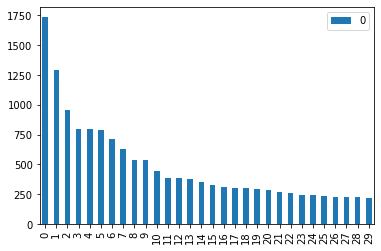

In [16]:
sorted_counts_train.plot.bar(use_index=False)

# Plot Test Data

In [17]:
test_counts = count_vect.fit_transform(test_df.text) 
word_list = count_vect.get_feature_names_out()

In [18]:
print(len(word_list))

1949


In [19]:
test_counts.shape[1]

1949

In [20]:
term_frequencies_test = []
for j in range(0,test_counts.shape[1]):
    term_frequencies_test.append(sum(test_counts[:,j]))


In [21]:
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

In [22]:
counts_test = pd.DataFrame([term_frequencies_test],columns=word_list)
counts_test

,10,11,11am,12,12s,138,158,15gets20,16,17,...,young,your,youraffair,yourself,youthful,yungdoujin,zen,zeroalcohol,zubairsabirpti,الخفجي
0,1,1,2,3,1,1,1,1,1,1,...,1,24,2,6,1,1,1,1,1,1


In [23]:
sorted_counts_test = counts_test.T.sort_values(by=0, ascending=False).head(30)

In [24]:
sorted_counts_test

,0
the,153
to,138
and,92
of,83
it,83
you,82
is,77
in,69
for,57
that,55


<AxesSubplot:>

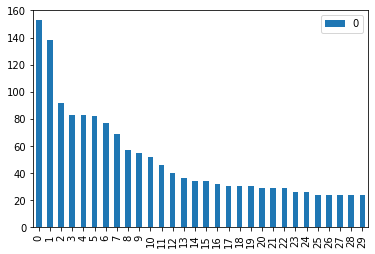

In [25]:
sorted_counts_test.plot.bar(use_index=False)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [26]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [27]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [28]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

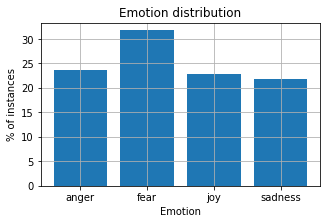

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

# 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [32]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [33]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [34]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [35]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [37]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [38]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [39]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(3613, 500)

In [40]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [42]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [43]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
features_train_tfidf = vectorizer.fit_transform(train_df.text)


In [44]:
print(features_train_tfidf)

  (0, 8549)	0.4270584131402391
  (0, 1440)	0.4270584131402391
  (0, 1439)	0.3574032554002519
  (0, 6439)	0.351485179010536
  (0, 6713)	0.3258184516552408
  (0, 7808)	0.3089122105463585
  (0, 2216)	0.4270584131402391
  (1, 2481)	0.31795332638101176
  (1, 6308)	0.40371048539924415
  (1, 5103)	0.3132486169626673
  (1, 7314)	0.40371048539924415
  (1, 891)	0.40371048539924415
  (1, 4107)	0.392170361767312
  (1, 5061)	0.19416779885388463
  (1, 3124)	0.34689449605013783
  (2, 2129)	0.5043833792910934
  (2, 382)	0.5043833792910934
  (2, 2387)	0.3345310842381948
  (2, 4845)	0.2655059379409944
  (2, 2568)	0.23321185793432914
  (2, 4165)	0.5043833792910934
  (3, 2620)	0.3758015468856382
  (3, 4887)	0.3758015468856382
  (3, 2704)	0.3758015468856382
  (3, 8182)	0.32722646321307536
  :	:
  (3611, 7742)	0.2768261633905813
  (3611, 7178)	0.3202805476700575
  (3611, 2275)	0.3202805476700575
  (3611, 6543)	0.298419744825283
  (3611, 4009)	0.24781290914609416
  (3611, 5173)	0.2768261633905813
  (3611, 37

In [45]:
vocabulary_tfidf = vectorizer.get_feature_names_out()
print(vocabulary_tfidf[100:110])


['2k17' '2much' '2nd' '30' '300' '301' '30am' '30pm' '30s' '31']


---
# 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [47]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'fear', 'fear', 'sadness', 'joy', 'joy', 'joy',
       'joy', 'fear'], dtype=object)

---
# 4. Results Evaluation

Now we will check the results of our model's performance

In [48]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [51]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

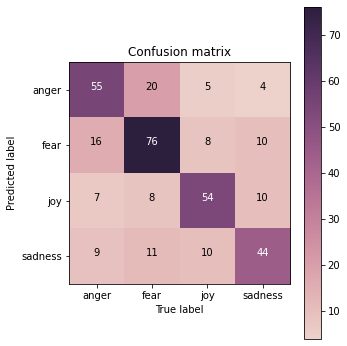

In [52]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The diagonal top left to bottom left is the correctly predicted result. For example, the first top left box interpert there are 55 predictions of anger that is actually anger. On the other hand, the bottom left box means there are 9 predictions of anger which actually is sadness.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [53]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
features_test_tfidf = vectorizer.transform(test_df.text)
mnb = MultinomialNB()
mnb.fit(features_train_tfidf, train_df.emotion)
mnb_predict = mnb.predict(features_test_tfidf)

In [54]:
acc_train = accuracy_score(y_true=test_df.emotion, y_pred=mnb_predict)
acc_test = accuracy_score(y_true=test_df.emotion, y_pred=mnb_predict)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.78
testing accuracy: 0.78


In [55]:
print(classification_report(y_true=test_df.emotion, y_pred=mnb_predict))

              precision    recall  f1-score   support

       anger       0.86      0.70      0.77        84
        fear       0.66      0.91      0.77       110
         joy       0.88      0.77      0.82        79
     sadness       0.86      0.68      0.76        74

    accuracy                           0.78       347
   macro avg       0.82      0.76      0.78       347
weighted avg       0.80      0.78      0.78       347



In [56]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_df.emotion, y_pred=mnb_predict) 
print(cm)

[[ 59  17   2   6]
 [  4 100   4   2]
 [  4  14  61   0]
 [  2  20   2  50]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

From the result, we can see that the Naive Bayes has higher similarity result between the training and test result. Compared to Decision tree where it score almost perfect on training but significantly lower on test.

## Naive Bayes

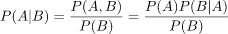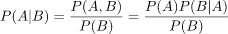

With Naive Bayes classifier it "ignore" irrelevant features, thus is less prone to overfitting
## Decision Tree

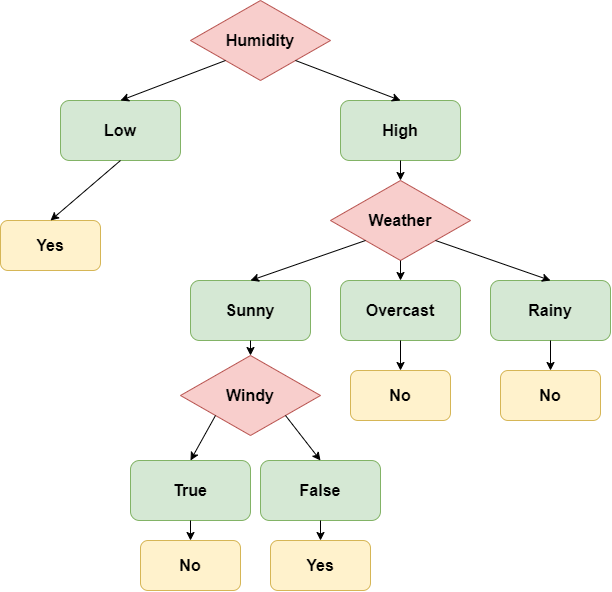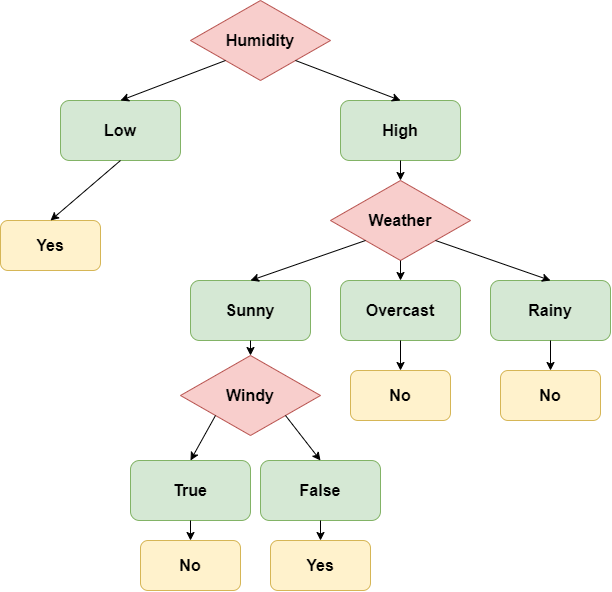

On the other hand, Decision Tree are more prone to overfitting.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering), such as: Word2Vec,PCA,LDA,FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
# 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic1.png)

### 6.1 Prepare data (X, y)

In [57]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [58]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 899        fear
1113       fear
2959    sadness
3537    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [59]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic2.png)

In [60]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

2022-11-26 15:19:25.260272: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

### 6.4 Train

In [61]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
2022-11-26 15:19:26.158038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


113/113 [==============================] - 1s 4ms/step - loss: 1.3298 - accuracy: 0.3631 - val_loss: 1.2833 - val_accuracy: 0.4092
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 1.0028 - accuracy: 0.6153 - val_loss: 0.9526 - val_accuracy: 0.6398
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7885 - val_loss: 0.7944 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8569 - val_loss: 0.7856 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.8929 - val_loss: 0.8503 - val_accuracy: 0.6830
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.9164 - val_loss: 0.8673 - val_accuracy: 0.6888
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9352 - val_loss: 0.9396 - val_accuracy: 0.6744
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [62]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.9869066e-01, 1.1258898e-03, 5.9840200e-05, 1.2360205e-04],
       [1.3217303e-05, 9.9863833e-01, 3.6932474e-06, 1.3447474e-03],
       [3.6005317e-03, 9.9624050e-01, 9.4805195e-08, 1.5894785e-04],
       [9.9089420e-01, 8.9739636e-03, 5.3412091e-10, 1.3177600e-04],
       [6.3451335e-02, 6.1626470e-01, 2.6703981e-01, 5.3244174e-02]],
      dtype=float32)

In [63]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'anger', 'fear'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [65]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363133,1.329788,0.409222,1.283338
1,1,0.615278,1.002847,0.639769,0.952574
2,2,0.788541,0.583218,0.677233,0.794386
3,3,0.856906,0.399869,0.688761,0.785590
4,4,0.892887,0.307875,0.682997,0.850282
5,5,0.916413,0.248553,0.688761,0.867315
6,6,0.935234,0.204071,0.674352,0.939590
7,7,0.950457,0.170294,0.671470,1.021245
8,8,0.959867,0.139529,0.688761,1.071393
9,9,0.963465,0.129782,0.674352,1.097235


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic3.png)![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic4.png)

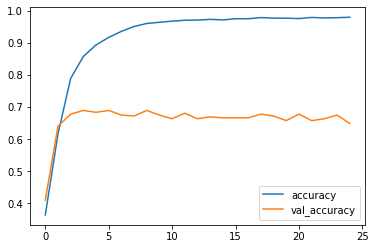

In [66]:
# Answer here

train_accur = pd.DataFrame(training_log, columns=['accuracy','val_accuracy'])
train_accur
train_accur.plot()
plt.show()

This plot shows that the training accuracy is higher than the validation accuracy(which is for testing data). This shows that our previos model is overfitting. We can use dropout to try to resolve this problem.

In [67]:
train_loss = pd.DataFrame(training_log, columns=['loss','val_loss'])
train_loss

,loss,val_loss
0,1.329788,1.283338
1,1.002847,0.952574
2,0.583218,0.794386
3,0.399869,0.785590
4,0.307875,0.850282
5,0.248553,0.867315
6,0.204071,0.939590
7,0.170294,1.021245
8,0.139529,1.071393
9,0.129782,1.097235


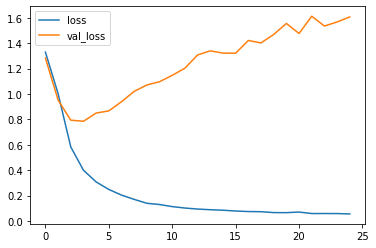

In [68]:
train_loss.plot()
plt.show()

Again, here the training loss is constantly decreasing but validation loss is not. The current model is able to memorize the patterns in training data but not as effective in the testing data. Thus, also shows overfitting.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
# 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [69]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
899,20042,@danisnotonfire you made me cry and shake to t...,"[@, danisnotonfire, you, made, me, cry, and, s..."
1113,20256,It feels like there are no houses out there fo...,"[It, feels, like, there, are, no, houses, out,..."
2959,40132,@HutchinsonDave I don't know whether to despai...,"[@, HutchinsonDave, I, do, n't, know, whether,..."
3537,40710,"The labor of love is not cheap or inexpensive,...","[The, labor, of, love, is, not, cheap, or, ine..."
535,10535,"The best #revenge is to move on, get over it, ...","[The, best, #, revenge, is, to, move, on, ,, g..."


In [70]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'danisnotonfire', 'you', 'made', 'me', 'cry', 'and', 'shake', 'to', 'the', 'point', 'where', 'my', 'parents', 'had', 'to', 'calm', 'me', 'down', 'and', 'give', 'me', 'calming', 'tablets', '...']),
       list(['It', 'feels', 'like', 'there', 'are', 'no', 'houses', 'out', 'there', 'for', 'us', '.', 'With', 'the', 'most', 'basic', 'requirements', 'I', 'have', ',', 'there', 'are', 'literally', 'no', 'options', '.', '#', 'discouraged']),
       list(['@', 'HutchinsonDave', 'I', 'do', "n't", 'know', 'whether', 'to', 'despair', 'or', 'agitate', 'for', 'a', 'cull', '.'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [71]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
899,20042,@danisnotonfire you made me cry and shake to t...,"[@, danisnotonfire, you, made, me, cry, and, s..."
1113,20256,It feels like there are no houses out there fo...,"[It, feels, like, there, are, no, houses, out,..."
2959,40132,@HutchinsonDave I don't know whether to despai...,"[@, HutchinsonDave, I, do, n't, know, whether,..."
3537,40710,"The labor of love is not cheap or inexpensive,...","[The, labor, of, love, is, not, cheap, or, ine..."
535,10535,"The best #revenge is to move on, get over it, ...","[The, best, #, revenge, is, to, move, on, ,, g..."


In [72]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [73]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.35893032,  0.33812183, -0.11580651,  0.44386798, -0.57022226,
       -0.6811133 ,  0.28455812,  1.2282948 , -0.5688517 , -0.4606613 ,
       -0.50691754, -0.15551569, -0.38636574,  0.16883568, -0.02584874,
       -0.45415044,  0.3118468 , -0.8260248 ,  0.11779887, -1.2697529 ,
        0.65752524,  0.5374014 ,  0.933112  ,  0.16499072,  0.1633294 ,
        0.01593372, -0.71684873,  0.39398703, -0.4028035 ,  0.46314588,
        0.08120811, -0.15472302,  0.59952193, -0.58624446,  0.04420424,
        0.6850175 ,  0.5109073 , -0.25382996, -0.67673045, -0.52905226,
       -0.03869208, -0.32360792, -0.34808528,  0.5420667 ,  0.760942  ,
       -0.80907977, -0.64202225,  0.22709043,  0.73067033,  0.09735655,
       -0.10122146, -0.5849996 , -0.0796832 ,  0.10626002, -0.29939064,
       -0.30284655, -0.19121572, -0.57350546, -0.19518422, -0.08765446,
       -0.03010066, -0.38054302,  0.6154982 ,  0.13303213, -0.42714268,
        0.66617435,  0.580698  ,  0.7299835 , -1.3961519 ,  0.94

In [74]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9337460398674011),
 ('free', 0.9102863073348999),
 ('blessed', 0.9082239270210266),
 ('plz', 0.9069785475730896),
 ('bday', 0.9060894250869751),
 ('.\\nA', 0.9021838903427124),
 ('Be', 0.8955312371253967),
 ('cats', 0.8933281898498535),
 ('PUSSY\\nP', 0.8905847072601318),
 ('register', 0.8902817964553833)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [75]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../input/googlenews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [76]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [77]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We can first change the sentence into a word vector also using for example nltk and find the features that are necessary to train the model.

# 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![image.png](https://camo.githubusercontent.com/630f4ff082ed061752822d94fce7b3da1f841301be6d5a3ee529d0bfe9186f87/68747470733a2f2f692e696d6775722e636f6d2f504564556635342e706e67)

In [78]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [79]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic6.png)

In [80]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [81]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


# 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic7.png)

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [82]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

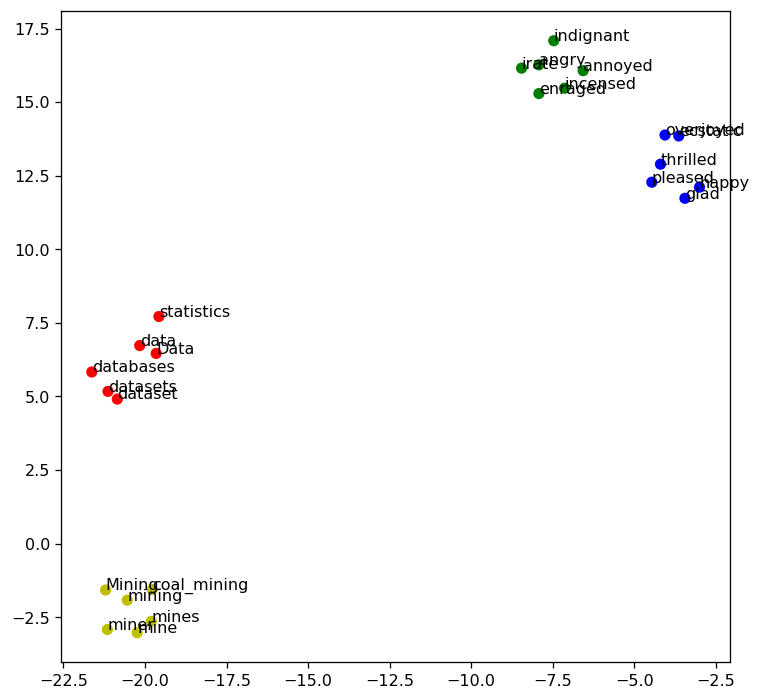

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [84]:
# Answer here
word_list = ['angry' , 'happy', 'sad' , 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

---

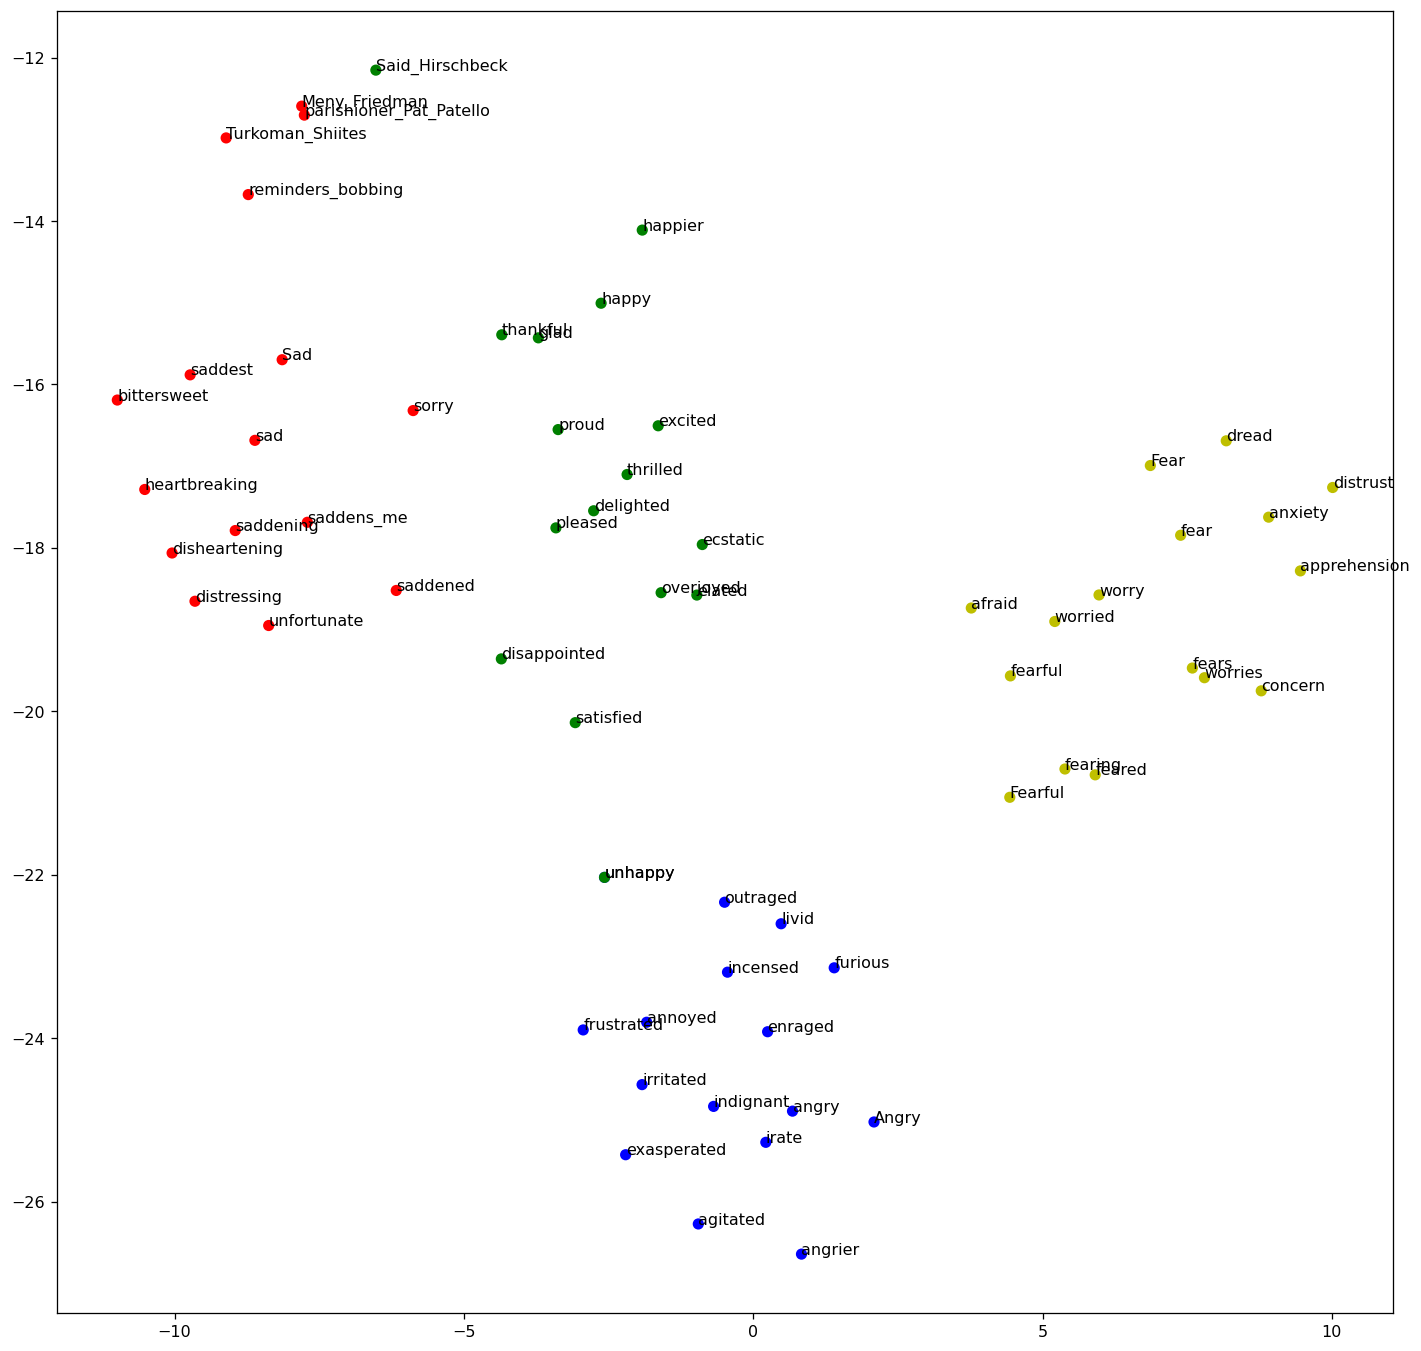

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Second Part

---
# 1. Data Preparation

## 1.1 Load Data

In [86]:
import pandas as pd
data_id = pd.read_csv("../input/lab2-data-competition/data_identification.csv/data_identification.csv")
emotions = pd.read_csv("../input/lab2-data-competition/emotion.csv/emotion.csv")
tweets = pd.read_json("../input/lab2-data-competition/tweets_DM.json/tweets_DM.json",lines=True)


In [87]:
data_id.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [88]:
emotions.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [89]:
tweets

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


Drop the unrelevant column

In [90]:

df2 = pd.DataFrame(tweets)
tweets = df2.iloc[:,2]

In [91]:
from pandas import json_normalize
# tweets.to_frame()
tweets = json_normalize(tweets)


In [92]:
tweets

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [93]:
tweets = tweets[['tweet.tweet_id','tweet.text']]
tweets = tweets.rename({'tweet.tweet_id': 'tweet_id', 'tweet.text': 'text'}, axis=1)


In [94]:
print(tweets[tweets['tweet_id'] == '0x2299d7'])

         tweet_id                                               text
1545267  0x2299d7  Man another sex bot followed me - is it my stu...


Merge the tables

In [95]:
combined = pd.merge(tweets,data_id)
combined.shape[0]


1867535

In [96]:
combined

,tweet_id,text,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train


In [97]:
print(combined[combined['tweet_id'] == '0x2299d7'])

         tweet_id                                               text  \
1545267  0x2299d7  Man another sex bot followed me - is it my stu...   

        identification  
1545267           test  


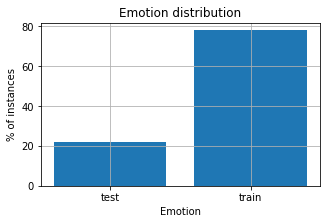

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = combined['identification'].unique()
post_total = len(combined)
df1 = combined.groupby(['identification']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [99]:
train_df = combined[combined['identification'] == 'train']
train_df = pd.merge(train_df,emotions)
train_df

,tweet_id,text,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [100]:
test_df = combined[combined['identification'] == 'test']
test_df

,tweet_id,text,identification
2,0x28b412,"Confident of your obedience, I write to you, k...",test
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test
9,0x218443,When do you have enough ? When are you satisfi...,test
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
33,0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",test
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",test
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test


## 1.2 Explore Data

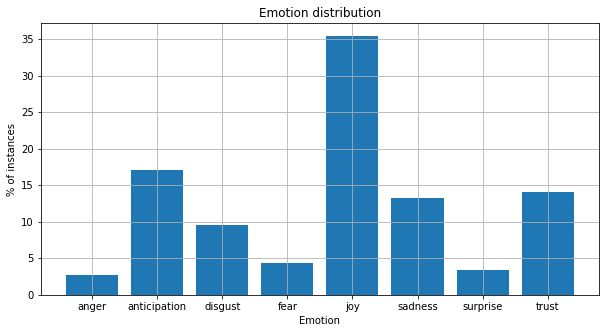

In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# 2. Feature Engineering

Here I used TF-IDF to change the words into vectors, with TF-IDF it can provide more importance of the words not only the frequency of the words.

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
features_train_tfidf = vectorizer.fit_transform(train_df.text)

# 3. Multinomial Naive Bayes

Here I used Naive Bayes for the chosen classifier model. Where Naive Bayes text classifier is based on the Bayes's Theorem.
It compute the conditional probabilities of occurrence of two events based on the probabilities of occurance each individual event to find insights.
For example, having insight of the probabilities of the word appears and occurs in the tweets where they appear more in on category and another will help the MNB text classifier predict for unknown text that contains the words that belongs to which category.

#### Bayesian Theorem:  
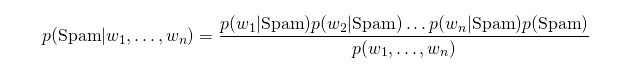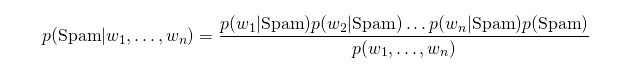

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
features_test_tfidf = vectorizer.transform(test_df.text)
mnb = MultinomialNB()
mnb.fit(features_train_tfidf, train_df.emotion)
mnb_predict = mnb.predict(features_train_tfidf)
acc_train = accuracy_score(y_true=train_df.emotion, y_pred=mnb_predict)

print('training accuracy: {}'.format(round(acc_train, 5)))


training accuracy: 0.52836


In [103]:
pred_result = mnb.predict(features_test_tfidf)
pred_result.shape[0]
type(pred_result)

numpy.ndarray

In [104]:
test_df['emotion'] = pred_result.tolist()
final_result = test_df.drop(columns=['text'])
final_result = final_result.rename({'tweet_id': 'id'}, axis=1)
final_result

,id,identification,emotion
2,0x28b412,test,anticipation
4,0x2de201,test,anticipation
9,0x218443,test,joy
30,0x2939d5,test,joy
33,0x26289a,test,joy
...,...,...,...
1867525,0x2913b4,test,anticipation
1867529,0x2a980e,test,anticipation
1867530,0x316b80,test,joy
1867531,0x29d0cb,test,joy


# 4. Save the result

In [20]:
final_result.to_csv('submission_naivebayes.csv',index=False)